![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Exercises
## The Sakila Database

One of the best example databases out there is the <a href="https://dev.mysql.com/doc/sakila/en/">Sakila Database</a>, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [3]:
conn = sqlite3.connect('/Users/michelkadi/dataanalysis1/FreeCodeCamp-Pandas-Real-Life-Example/data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

# df.head() is a Pandas method that 
returns the first 5 rows of a DataFrame.
Optional argument

You can choose how many rows to display:

df.head(10)   #

In [4]:
df.head(8)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17
6,2005-05-24 23:08:07,2005-05-27 01:32:07,CHRISTENSON,1,Lethbridge,MYSTIC TRUMAN,5,0.99,19.99,NC-17
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13
8,2005-05-24 23:31:46,2005-05-27 23:33:46,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G


df.shape returns the dimensions of your DataFrame as a tuple:

(rows, columns)

In [5]:
df.shape

(16044, 10)

In [6]:
df['film_rental_duration'].mean()

4.935489902767389

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the most common rental duration?

Show a <b>bar plot</b> with all the durations.

<Axes: xlabel='film_rental_duration'>

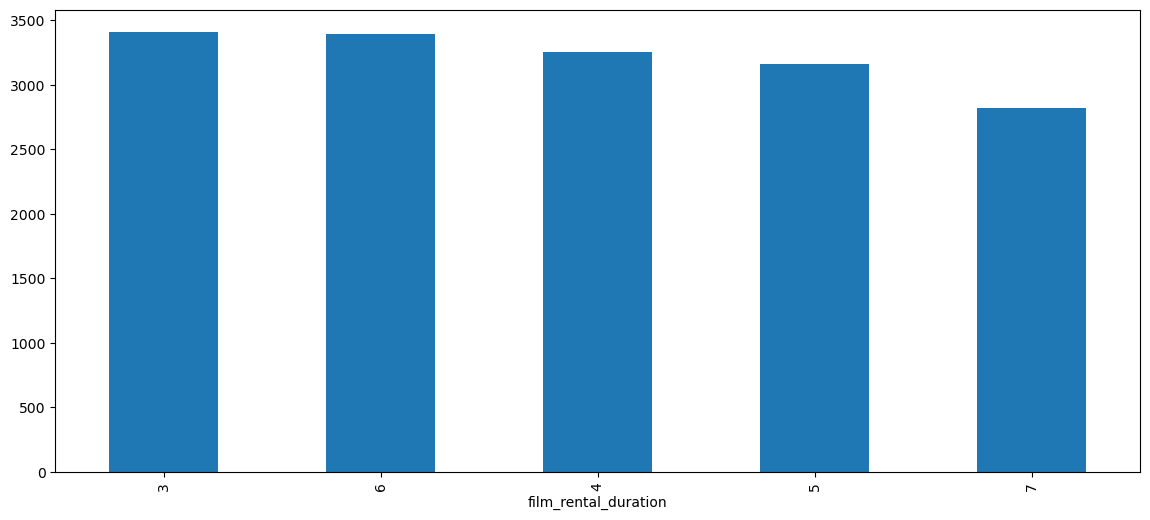

In [9]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))

✅ Explanation
1. Plotting a density plot
ax = df['film_rental_duration'].plot(kind='density', figsize=(14,6))


df['film_rental_duration'] selects the column.

.plot(kind='density') creates a kernel density estimate (KDE) plot, which shows the distribution of the data (smoothed version of a histogram).

figsize=(14,6) sets the figure size.

The returned object ax is a Matplotlib Axes object, which you can use to add more elements to the plot.

## Adding a vertical line for the mean
ax.axvline(df['film_rental_duration'].mean(), color='red')


df['film_rental_duration'].mean() calculates the mean rental duration.

ax.axvline() draws a vertical line at that value.

color='red' makes the line red to highlight it.

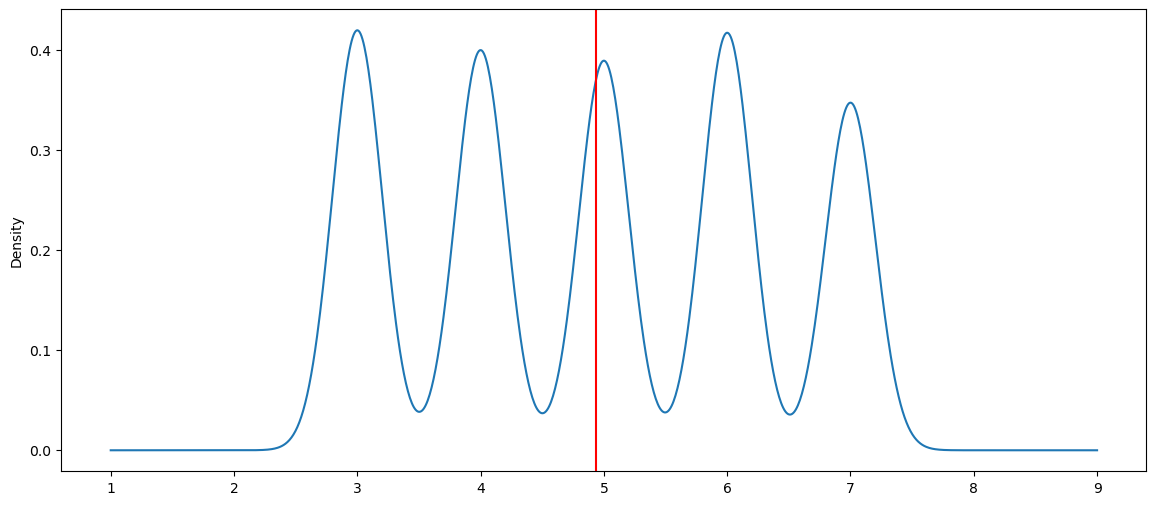

In [12]:
ax = df['film_rental_duration'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_rental_duration'].mean(), color='red')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [13]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `rental_days` column

This numeric column should have the count of days between `rental_date` and `return_date`.

Explanation
df['rental_days'] = df[['rental_date', 'return_date']].apply(
    lambda x: (x[1] - x[0]).days, 
    axis=1
)


df[['rental_date', 'return_date']] → selects the two columns.

.apply(..., axis=1) → applies the lambda row-by-row.

(x[1] - x[0]).days → subtracts the two datetime objects → gives a timedelta, then extracts the number of days.

In [14]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)

df['rental_days'].head()

/var/folders/bt/6xq4lr7166q421mhm_56h2z40000gr/T/ipykernel_18263/1626817116.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)


rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `rental_days`

- Calculate the mean of `rental_days`.
- Show a <b>density (KDE)</b> of `rental_days`.

df['rental_days'] selects the column.

.mean() computes the arithmetic mean (ignoring NaN values automatically).

Example
df['rental_days'].mean()

mean() is a function used to calculate the average value of a set of numbers.

pandas will:

take all the numeric values in the column

ignore any missing values (NaN)

compute the arithmetic average

In [15]:
df['rental_days'].mean()

4.525944139713763

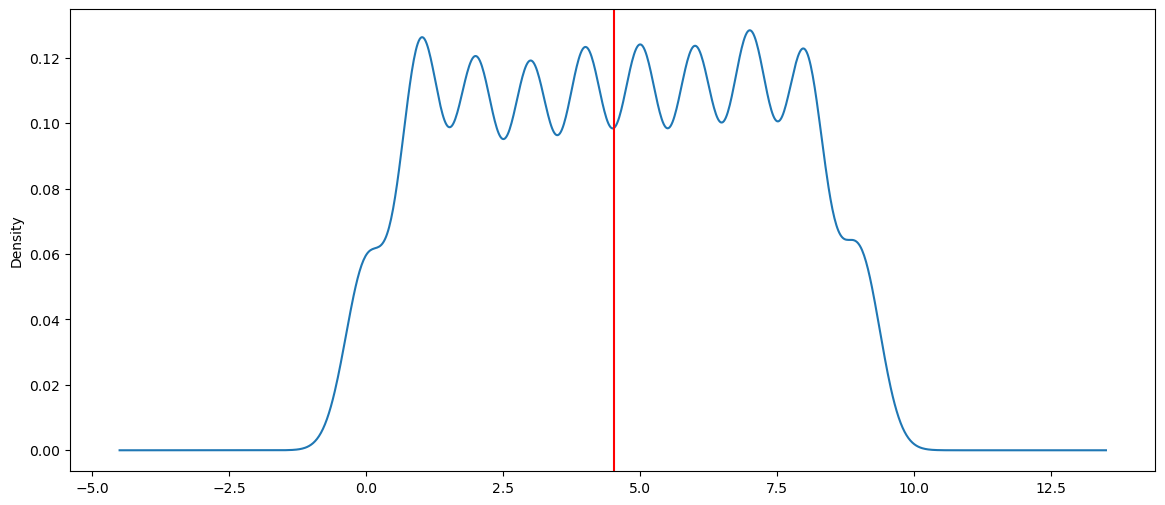

In [16]:
ax = df['rental_days'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_days'].mean(), color='red')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [17]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `film_daily_rental_rate`

- Calculate the mean of `film_daily_rental_rate`.
- Show a <b>density (KDE)</b> of `film_daily_rental_rate`.

In [18]:
df['film_daily_rental_rate'].mean()

0.6458262471655329

ax.axvline(df['film_daily_rental_rate'].mean(), color='red')
This line simply draws a vertical line on your plot at the mean value of the column film_daily_rental_rate.

Breakdown:

df['film_daily_rental_rate'].mean()
Computes the average daily rental rate.

ax.axvline(... )
Draws a vertical line on the existing axes.

color='red'
Colors the line red so it stands out.

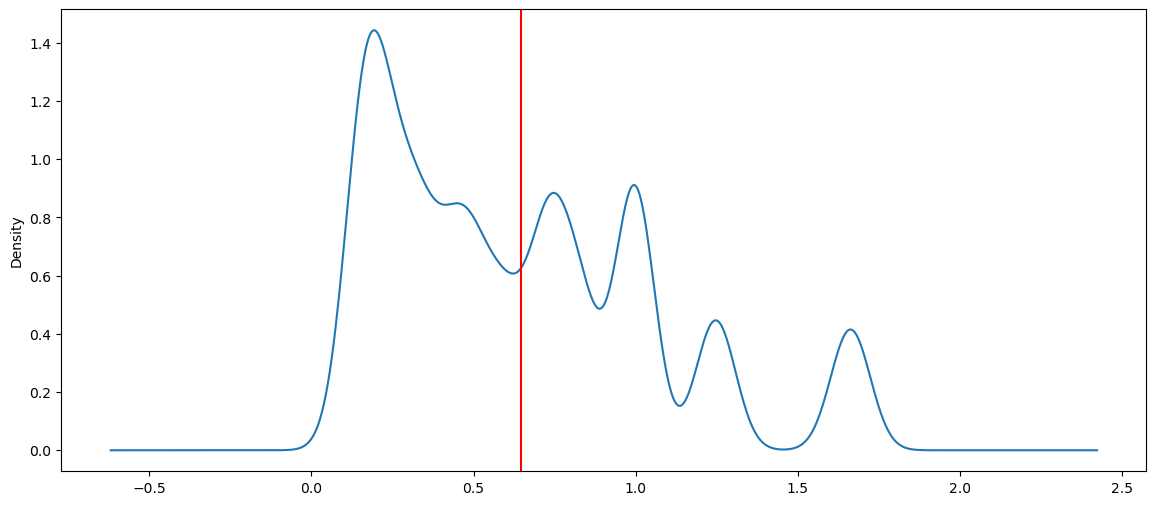

In [19]:
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the lowest daily rental rate

What it does

df['film_daily_rental_rate'].min()
Finds the smallest value in the column.

df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()
Creates a boolean mask selecting only rows where the value equals the minimum.

df.loc[...]
Returns the rows with that minimum value.

.head(10)
Shows the first 10 of those rows.

In [20]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)


,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,film_daily_rental_rate,rental_days
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,0.141429,6.0
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,0.141429,3.0
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,0.141429,7.0
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,0.141429,1.0
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,0.141429,9.0
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,0.141429,3.0
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,0.141429,6.0
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,0.141429,4.0
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,0.141429,6.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Lethbridge city?

In [21]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

In [22]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

film_rating
PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: count, dtype: int64

<Axes: xlabel='film_rating'>

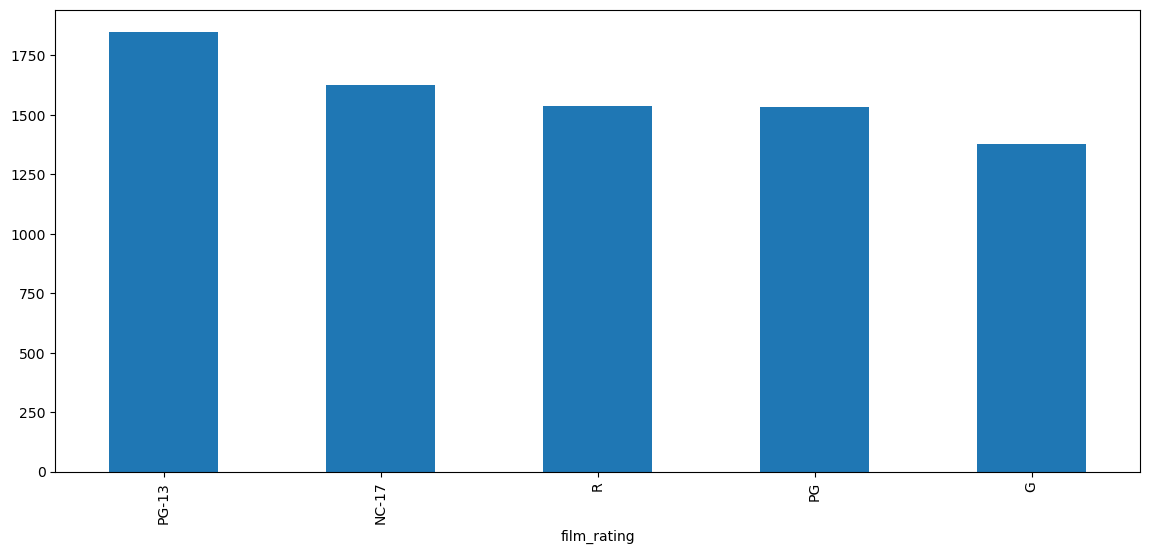

In [23]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [24]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?

In [25]:
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]

8444